# **Simple Linear Regression**
<hr>

Simple linear regression is used to model the relationship between two quantitative variables. Often, the objective is to predict the value of an output variable (or response) based on the value of an input (or predictor) variable.

### **Formula:**

$$
y = b_0 + b_1 \cdot x_1
$$

- **y** - Dependent Variable
- **x_1** - Independent Variable
- **b_1** - Coefficient - The sign and the value of the coefficient indicate how much has relationship is and the direction of the relationship between a dependent variable and the independent 
- **b_0** - Constant

### **Task:**
Find the best value to the coefficient and the constant based on our data. What is the best value? The values that guarantees the **minimum coast function**.

#### **Coast Function**

$$
J = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y_i})^2
$$

![](https://i.imgur.com/1raV7VL.png)

#### **How to find b_0 and b_1?**
- Brute Force
- Least Squares
$$
b_1 = \frac{n \sum x_i y_i - \sum x_i \cdot \sum y_i}{n \sum x_i^2 - (\sum x_i)^2} 
$$

$$
b_0 = \frac{\sum y_i - b_1 \sum x_i}{n}
$$
- Gradient Descendent


### **Example:**

![](https://i.imgur.com/ascNIdK.png)

- When the experience is 0, the salary is the constant or the starting salary
- The salary increases based on the years of experience

## **Importing the libraries**
<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **Importing the dataset**
<hr>

In [2]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


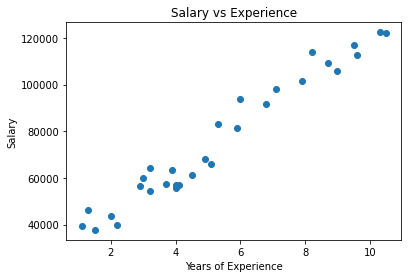

In [4]:
plt.scatter(x=df["YearsExperience"], y=df["Salary"])
plt.title("Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

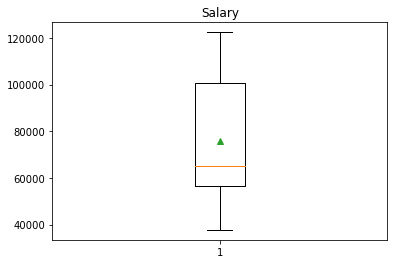

In [5]:
plt.boxplot(x=df["Salary"], showmeans=True)
plt.title("Salary")
plt.show()

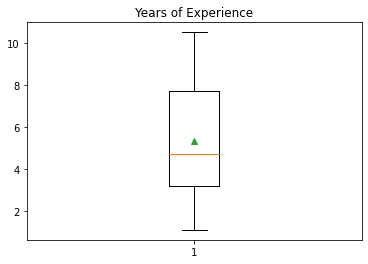

In [6]:
plt.boxplot(x=df["YearsExperience"], showmeans=True)
plt.title("Years of Experience")
plt.show()

In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [8]:
print("Years of Experience\n", X)

Years of Experience
 [[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [9]:
print("Salary\n", y)

Salary
 [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


## **Splitting the dataset into the Training set and Test set**
<hr>

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

## **Why didn’t we apply Feature Scaling in our Simple Linear Regression model?**
<hr>
It’s simply because since y is a linear combination of the independent variables, the coefficients can adapt
their scale to put everything on the same scale. For example if you have two independent variables x1 and
x2 and if y takes values between 0 and 1, x1 takes values between 1 and 10 and x2 takes values between 10
and 100, then b1 can be multiplied by 0.1 and b2 can be multiplied by 0.01 so that y, b1.x1 and b2.x2 are all
on the same scale.

## **Training the Simple Linear Regression model on the Training set**
<hr>

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X=X_train, y=y_train)

LinearRegression()

## **Getting the final linear regression equation with the values of the coefficients**
<hr>

- **b_1** value:

In [12]:
regressor.coef_

array([9345.94244312])

- **b_0** value:

In [13]:
regressor.intercept_

26816.19224403119

Therefore, the equation of our simple linear regression model is:

$$\textrm{Salary} = 9345.94 \times \textrm{YearsExperience} + 26816.19$$


## **Predicting the Test set results**
<hr>

In [14]:
y_pred = regressor.predict(X_test)
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9749154407708353

## **Visualising the Training set results**
<hr>

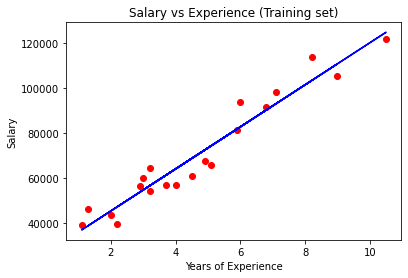

In [16]:
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

## **Visualising the Test set results**
<hr>

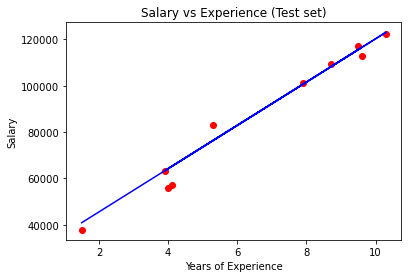

In [17]:
plt.scatter(X_test, y_test, color="red")
plt.plot(X_test, regressor.predict(X_test), color="blue")
plt.title("Salary vs Experience (Test set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

## **Making a single prediction (for example the salary of an employee with 12 years of experience)**
<hr>

In [18]:
print(regressor.predict([[12]]))

[138967.5015615]


Therefore, our model predicts that the salary of an employee with 12 years of experience is $ 138967,5.

**Important note:** Notice that the value of the feature (12 years) was input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting 12 into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$12 \rightarrow \textrm{scalar}$

$[12] \rightarrow \textrm{1D array}$

$[[12]] \rightarrow \textrm{2D array}$